# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.2'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Tanzania', 'Dominica']

,
 

4

: 

[

'Mauritius'

, 

'Bahamas'

, 

'Trinidad and Tobago'

, 

'Belize'

, 

'Brunei'

,
     

'Seychelles'

, 

'Myanmar'

]

,
 

5

: 

[

'Namibia'

, 

'Papua New Guinea'

, 

'Guyana'

, 

'Antigua and Barbuda'

, 

'Norway'

,
     

'Angola'

, 

'Fiji'

, 

'Grenada'

, 

'Botswana'

]

,
 

6

: 

[

'Kyrgyzstan'

, 

'Ireland'

, 

'Slovakia'

, 

'Vietnam'

, 

'Montenegro'

, 

'Spain'

,
     

'Kosovo'

, 

'Uganda'

, 

'Paraguay'

, 

'Libya'

, 

'Tunisia'

, 

'Kazakhstan'

, 

'Malta'

,
     

'Iceland'

, 

'Gambia'

, 

'Morocco'

, 

'Ethiopia'

, 

'Syria'

, 

'Mongolia'

,
     

'Sao Tome and Principe'

, 

'Netherlands'

, 

'Eritrea'

, 

'Lebanon'

,
     

'Philippines'

, 

'Equatorial Guinea'

, 

'Israel'

, 

'Zambia'

, 

'Zimbabwe'

,
     

'Central African Republic'

, 

'Lesotho'

, 

'South Sudan'

, 

'Cambodia'

,
     

'Yemen'

]

,
 

7

: 

[

'Saint Lucia'

, 

'Argentina'

, 

'Bosnia and Herzegovina'

, 

'Liechtenstein'

,
     

'Bhutan'

, 

'Cameroon'

, 

'Burundi'

, 

'Jordan'

, 

'Cyprus'

, 

'Costa Rica'

,
     

'San Marino'

, 

'Malawi'

, 

'Afghanistan'

, 

'Venezuela'

, 

'Benin'

, 

'Australia'

,
     

'Mozambique'

, 

'Colombia'

, 

'Barbados'

, 

'Luxembourg'

, 

'Taiwan'

, 

'Nicaragua'

,
     

'Madagascar'

, 

'Kenya'

, 

'Palestine'

, 

'Suriname'

, 

'Bermuda'

, 

'Guatemala'

,
     

'Japan'

, 

'Maldives'

, 

'Thailand'

, 

'New Zealand'

,
     

'Saint Vincent and the Grenadines'

, 

'Chad'

]

,
 

8

: 

[

'Comoros'

, 

'India'

, 

'Guinea-Bissau'

, 

'Sri Lanka'

, 

'Tajikistan'

, 

'Somalia'

,
     

'Croatia'

, 

'Iraq'

, 

'Congo'

, 

'Indonesia'

, 

'South Africa'

, 

'Ghana'

, 

'Monaco'

,
     

'Cape Verde'

, 

'Swaziland'

, 

'Nepal'

, 

'Greece'

, 

'Djibouti'

, 

'Niger'

,
     

'Ecuador'

, 

'Finland'

, 

'Mauritania'

, 

'Rwanda'

, 

'Slovenia'

, 

'Oman'

,
     

'Uzbekistan'

, 

'China'

]

,
 

9

: 

[

'Uruguay'

, 

'Sudan'

, 

'Ukraine'

, 

'Andorra'

, 

'Albania'

, 

'Cuba'

,
     

'Sierra Leone'

, 

'Brazil'

, 

'Qatar'

, 

'Gabon'

, 

'Mali'

, 

'Togo'

, 

'Belgium'

,
     

'Malaysia'

, 

'Honduras'

, 

'Haiti'

, 

'Switzerland'

, 

'Austria'

, 

'Azerbaijan'

,
     

'Pakistan'

, 

'Singapore'

, 

'Liberia'

, 

'Belarus'

, 

'Armenia'

, 

'Korea, South'

,
     

'Jamaica'

, 

'Chile'

, 

'Canada'

, 

'Germany'

, 

'Romania'

, 

'El Salvador'

]

,
 

10

: 

[

'Senegal'

, 

'Peru'

, 

'Hungary'

, 

'Serbia'

, 

'Burkina Faso'

, 

'Estonia'

,
      

'Poland'

, 

'Bulgaria'

, 

'Algeria'

, 

'Latvia'

, 

'Turkey'

, 

'Dominican Republic'

,
      

'Portugal'

, 

'Bolivia'

, 

'Macedonia'

, 

'Czech Republic'

, 

'Lithuania'

,
      

'Panama'

, 

'Moldova'

, 

'Egypt'

, 

'Saudi Arabia'

, 

'Denmark'

]

,
 

11

: 

[

'Iran'

, 

'Georgia'

, 

'Guinea'

, 

'Bangladesh'

, 

'United States'

, 

'Nigeria'

,
      

'United Arab Emirates'

, 

'France'

, 

'Kuwait'

, 

'Italy'

, 

'Mexico'

,
      

'Bahrain'

]

,
 

12

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=11)
# The number of countries
len(analyser.countries)

13

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

11

: 

[

'Iran'

, 

'Georgia'

, 

'Guinea'

, 

'Bangladesh'

, 

'United States'

, 

'Nigeria'

,
      

'United Arab Emirates'

, 

'France'

, 

'Kuwait'

, 

'Italy'

, 

'Mexico'

,
      

'Bahrain'

]

,
 

12

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  15May2020   330457362
        2nd    Past  16May2020  23May2020   330457362
        3rd    Past  24May2020  01Jun2020   330457362
        4th    Past  02Jun2020  10Jun2020   330457362
        5th    Past  11Jun2020  20Jun2020   330457362
        6th    Past  21Jun2020  30Jun2020   330457362
        7th    Past  01Jul2020  11Jul2020   330457362
        8th    Past  12Jul2020  24Jul2020   330457362
        9th    Past  25Jul2020  08Aug2020   330457362
        10th   Past  09Aug2020  25Aug2020   330457362
        11th   Past  26Aug2020  12Sep2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	BGD,  3rd phase (21Jun2020 - 28Jun2020): finished 1142 trials in 0 min 35 sec

	GEO,  7th phase (23Jul2020 - 06Aug2020): finished 1769 trials in 1 min  0 sec

	MEX,  2nd phase (08Jun2020 - 20Jun2020): finished 1813 trials in 1 min  0 sec

	MEX,  4th phase (02Jul2020 - 09Jul2020): finished 1800 trials in 1 min  0 sec

	MEX,  7th phase (31Jul2020 - 09Aug2020): finished  246 trials in 0 min  5 sec

	RUS,  6th phase (21Jun2020 - 30Jun2020): finished 1908 trials in 1 min  0 sec

	USA,  6th phase (16Jul2020 - 23Jul2020): finished  244 trials in 0 min  5 sec

	GIN,  2nd phase (13May2020 - 26May2020): finished 1842 trials in 1 min  0 sec

	RUS,  9th phase (25Jul2020 - 08Aug2020): finished 1815 trials in 1 min  0 sec

	GIN,  0th phase (03Apr2020 - 30Apr2020): finished 1779 trials in 1 min  0 sec

	BGD, 10th phase (29Aug2020 - 12Sep2020): finished  811 trials in 0 min 25 sec

	GIN,  3rd phase (27May2020 - 06Jun2020): finished 1609 trials in 1 min  0 sec

	KWT,  8th phase (09Aug2020 - 20Aug2020): finished 1631 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 15Jun2020): finished 1623 trials in 1 min  0 sec

	FRA,  5th phase (06May2020 - 27May2020): finished  522 trials in 0 min 15 sec

	IRN,  8th phase (28Jul2020 - 09Aug2020): finished 1339 trials in 0 min 45 sec

	GIN,  1st phase (01May2020 - 12May2020): finished 1630 trials in 1 min  0 sec

	NGA,  5th phase (05Jul2020 - 12Jul2020): finished  369 trials in 0 min 10 sec

	BHR,  7th phase (27Jul2020 - 09Aug2020): finished  993 trials in 0 min 30 sec

	MEX,  3rd phase (21Jun2020 - 01Jul2020): finished 1787 trials in 1 min  0 sec

	GEO,  4th phase (30May2020 - 12Jun2020): finished 1850 trials in 1 min  0 sec

	RUS,  5th phase (11Jun2020 - 20Jun2020): finished 1904 trials in 1 min  0 sec

	ITA,  5th phase (01May2020 - 09May2020): finished  634 trials in 0 min 15 sec

	GIN,  8th phase (06Aug2020 - 16Aug2020): finished 2001 trials in 1 min  0 sec

	FRA,  7th phase (26Jun2020 - 22Jul2020): finished  461 trials in 0 min 10 sec

	BHR,  9th phase (23Aug2020 - 03Sep2020): finished 1987 trials in 1 min  0 sec

	FRA,  4th phase (25Apr2020 - 05May2020): finished 1992 trials in 1 min  0 sec

	ARE,  5th phase (19Jun2020 - 01Jul2020): finished 1030 trials in 0 min 25 sec

	FRA,  3rd phase (13Apr2020 - 24Apr2020): finished 2017 trials in 1 min  0 sec

	ARE,  6th phase (02Jul2020 - 10Jul2020): finished 2016 trials in 1 min  0 sec

	ITA,  9th phase (17Jul2020 - 20Aug2020): finished 1836 trials in 1 min  0 sec

	NGA,  1st phase (19May2020 - 06Jun2020): finished 1860 trials in 1 min  0 sec

	ITA,  3rd phase (10Apr2020 - 18Apr2020): finished  363 trials in 0 min 15 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1484 trials in 1 min  0 sec

	USA,  3rd phase (06Jun2020 - 23Jun2020): finished  428 trials in 0 min 15 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1442 trials in 1 min  0 sec

	FRA,  8th phase (23Jul2020 - 10Aug2020): finished  418 trials in 0 min 15 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1321 trials in 1 min  0 sec

	ITA,  6th phase (10May2020 - 19May2020): finished  177 trials in 0 min  5 sec

	USA,  2nd phase (11May2020 - 05Jun2020): finished 1434 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 14May2020): finished 1364 trials in 1 min  0 sec

	GEO,  0th phase (16Mar2020 - 12Apr2020): finished 1597 trials in 1 min  0 sec

	RUS, 10th phase (09Aug2020 - 25Aug2020): finished 1819 trials in 1 min  0 sec

	GIN, 10th phase (30Aug2020 - 12Sep2020): finished  429 trials in 0 min 10 sec

	ITA, 10th phase (21Aug2020 - 12Sep2020): finished 1944 trials in 1 min  0 sec

	GEO,  9th phase (17Aug2020 - 30Aug2020): finished 1972 trials in 1 min  0 sec

	RUS,  8th phase (12Jul2020 - 24Jul2020): finished 1947 trials in 1 min  0 sec

	GEO,  2nd phase (30Apr2020 - 12May2020): finished 1821 trials in 1 min  0 sec

	RUS, 11th phase (26Aug2020 - 12Sep2020): finished 1552 trials in 0 min 50 sec

	ARE,  1st phase (25Apr2020 - 12May2020): finished 1787 trials in 1 min  0 sec

	IRN,  2nd phase (18Apr2020 - 12May2020): finished  468 trials in 0 min 10 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 1790 trials in 1 min  0 sec

	GIN,  4th phase (07Jun2020 - 19Jun2020): finished 1933 trials in 1 min  0 sec

	ARE,  3rd phase (28May2020 - 06Jun2020): finished 1946 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1952 trials in 1 min  0 sec

	ITA,  8th phase (07Jun2020 - 16Jul2020): finished 1008 trials in 0 min 25 sec

	IRN,  5th phase (16Jun2020 - 29Jun2020): finished 2000 trials in 1 min  0 sec

	NGA,  4th phase (27Jun2020 - 04Jul2020): finished  259 trials in 0 min  5 sec

	IRN, 10th phase (25Aug2020 - 12Sep2020): finished  477 trials in 0 min 10 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 2009 trials in 1 min  0 sec

	GEO,  8th phase (07Aug2020 - 16Aug2020): finished 1510 trials in 0 min 40 sec

	GIN,  5th phase (20Jun2020 - 08Jul2020): finished  253 trials in 0 min  5 sec

	GIN,  7th phase (23Jul2020 - 05Aug2020): finished 2021 trials in 1 min  0 sec

	MEX,  8th phase (10Aug2020 - 19Aug2020): finished 2033 trials in 1 min  0 sec

	FRA, 10th phase (28Aug2020 - 12Sep2020): finished 1994 trials in 1 min  0 sec

	BGD,  5th phase (07Jul2020 - 15Jul2020): finished 2014 trials in 1 min  0 sec

	GIN,  9th phase (17Aug2020 - 29Aug2020): finished 2001 trials in 1 min  0 sec

	BGD,  7th phase (26Jul2020 - 06Aug2020): finished  479 trials in 0 min 10 sec

	BHR,  8th phase (10Aug2020 - 22Aug2020): finished  255 trials in 0 min  5 sec

	NGA,  7th phase (21Jul2020 - 07Aug2020): finished 1996 trials in 1 min  0 sec

	ITA,  4th phase (19Apr2020 - 30Apr2020): finished 2003 trials in 1 min  0 sec

	FRA,  1st phase (25Mar2020 - 02Apr2020): finished 2016 trials in 1 min  0 sec

	IRN,  6th phase (30Jun2020 - 12Jul2020): finished  256 trials in 0 min  5 sec

	NGA,  2nd phase (07Jun2020 - 17Jun2020): finished  252 trials in 0 min  5 sec

	RUS,  4th phase (02Jun2020 - 10Jun2020): finished 2011 trials in 1 min  0 sec

	MEX,  9th phase (20Aug2020 - 30Aug2020): finished 2017 trials in 1 min  0 sec

	GEO,  3rd phase (13May2020 - 29May2020): finished 1992 trials in 1 min  0 sec

	MEX,  1st phase (21May2020 - 07Jun2020): finished 1174 trials in 0 min 30 sec

	KWT,  4th phase (23Jun2020 - 03Jul2020): finished 2008 trials in 1 min  0 sec

	USA,  8th phase (08Aug2020 - 17Aug2020): finished  677 trials in 0 min 15 sec

	USA,  9th phase (18Aug2020 - 28Aug2020): finished  251 trials in 0 min  5 sec

	KWT,  7th phase (27Jul2020 - 08Aug2020): finished 1345 trials in 0 min 35 sec

	IRN,  3rd phase (13May2020 - 31May2020): finished  254 trials in 0 min  5 sec

	GEO,  5th phase (13Jun2020 - 06Jul2020): finished 1993 trials in 1 min  0 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 2021 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 09Apr2020): finished 2018 trials in 1 min  0 sec

	ARE, 10th phase (02Sep2020 - 12Sep2020): finished 2027 trials in 1 min  0 sec

	USA,  1st phase (18Apr2020 - 10May2020): finished 2000 trials in 1 min  0 sec

	KWT,  1st phase (15May2020 - 27May2020): finished 2002 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 15May2020): finished 1997 trials in 1 min  0 sec

	MEX,  5th phase (10Jul2020 - 18Jul2020): finished 2011 trials in 1 min  0 sec

	NGA, 10th phase (27Aug2020 - 12Sep2020): finished  473 trials in 0 min 10 sec

	KWT,  3rd phase (08Jun2020 - 22Jun2020): finished 1993 trials in 1 min  0 sec

	GEO,  6th phase (07Jul2020 - 22Jul2020): finished  478 trials in 0 min 10 sec

	ARE,  0th phase (12Feb2020 - 24Apr2020): finished 1972 trials in 1 min  0 sec

	IRN,  9th phase (10Aug2020 - 24Aug2020): finished 2019 trials in 1 min  0 sec

	MEX,  6th phase (19Jul2020 - 30Jul2020): finished 2025 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 24Mar2020): finished 1873 trials in 1 min  0 sec

	BGD,  9th phase (17Aug2020 - 28Aug2020): finished  255 trials in 0 min  5 sec

	BGD,  2nd phase (12Jun2020 - 20Jun2020): finished 2016 trials in 1 min  0 sec

	GIN,  6th phase (09Jul2020 - 22Jul2020): finished 1995 trials in 1 min  0 sec

	BHR,  4th phase (22Jun2020 - 07Jul2020): finished 1990 trials in 1 min  0 sec

	IRN,  7th phase (13Jul2020 - 27Jul2020): finished  250 trials in 0 min  5 sec

	BHR,  6th phase (16Jul2020 - 26Jul2020): finished 2010 trials in 1 min  0 sec

	ARE,  8th phase (27Jul2020 - 17Aug2020): finished 1000 trials in 0 min 25 sec

	ITA,  7th phase (20May2020 - 06Jun2020): finished  471 trials in 0 min 10 sec

	RUS,  7th phase (01Jul2020 - 11Jul2020): finished 1996 trials in 1 min  0 sec

	GEO,  1st phase (13Apr2020 - 29Apr2020): finished 1987 trials in 1 min  0 sec

	NGA,  3rd phase (18Jun2020 - 26Jun2020): finished  248 trials in 0 min  5 sec

	BGD,  0th phase (16Mar2020 - 26May2020): finished 1933 trials in 1 min  0 sec

	RUS,  3rd phase (24May2020 - 01Jun2020): finished 1984 trials in 1 min  0 sec

	NGA,  0th phase (18Mar2020 - 18May2020): finished 1945 trials in 1 min  0 sec

	KWT,  9th phase (21Aug2020 - 01Sep2020): finished  472 trials in 0 min 10 sec

	BHR,  5th phase (08Jul2020 - 15Jul2020): finished 2013 trials in 1 min  0 sec

	BHR,  3rd phase (12Jun2020 - 21Jun2020): finished 1998 trials in 1 min  0 sec

	BGD,  6th phase (16Jul2020 - 25Jul2020): finished  249 trials in 0 min  5 sec

	GEO, 10th phase (31Aug2020 - 12Sep2020): finished 2016 trials in 1 min  0 sec

	FRA,  9th phase (11Aug2020 - 27Aug2020): finished  680 trials in 0 min 15 sec

	USA,  7th phase (24Jul2020 - 07Aug2020): finished  252 trials in 0 min  5 sec

	FRA,  6th phase (28May2020 - 25Jun2020): finished 1479 trials in 0 min 40 sec

	KWT,  6th phase (15Jul2020 - 26Jul2020): finished  445 trials in 0 min 10 sec

	ARE,  7th phase (11Jul2020 - 26Jul2020): finished  251 trials in 0 min  5 sec

	USA,  0th phase (09Feb2020 - 17Apr2020): finished 1946 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 27May2020): finished 1995 trials in 1 min  0 sec

	BGD,  1st phase (27May2020 - 11Jun2020): finished 1990 trials in 1 min  0 sec

	ARE,  4th phase (07Jun2020 - 18Jun2020): finished 1040 trials in 0 min 25 sec

	NGA,  6th phase (13Jul2020 - 20Jul2020): finished  480 trials in 0 min 10 sec

	RUS,  2nd phase (16May2020 - 23May2020): finished 2025 trials in 1 min  0 sec

	MEX,  0th phase (03Mar2020 - 20May2020): finished 1956 trials in 1 min  0 sec

	USA,  4th phase (24Jun2020 - 06Jul2020): finished 2025 trials in 1 min  0 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 2015 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 2056 trials in 1 min  0 sec

	BHR,  2nd phase (01Jun2020 - 11Jun2020): finished 2083 trials in 1 min  0 sec

	BHR, 10th phase (04Sep2020 - 12Sep2020): finished  905 trials in 0 min 20 sec

	BGD,  4th phase (29Jun2020 - 06Jul2020): finished  709 trials in 0 min 15 sec

	NGA,  9th phase (18Aug2020 - 26Aug2020): finished 1099 trials in 0 min 25 sec

	KWT,  5th phase (04Jul2020 - 14Jul2020): finished  266 trials in 0 min  5 sec

	ARE,  9th phase (18Aug2020 - 01Sep2020): finished 1081 trials in 0 min 25 sec

Completed optimization. Total: 25 min 59 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  07May2020  15May2020   330457362  SIR-F  2.46  0.000639   
        2nd    Past  16May2020  23May2020   330457362  SIR-F  1.51  0.000440   
        3rd    Past  24May2020  01Jun2020   330457362  SIR-F  0.96  0.019607   
        4th    Past  02Jun2020  10Jun2020   330457362  SIR-F  0.93  0.018138   
        5th    Past  11Jun2020  20Jun2020   330457362  SIR-F  1.01  0.018282   
        6th    Past  21Jun2020  30Jun2020   330457362  SIR-F  0.90  0.021825   
        7th    Past  01Jul2020  11Jul2020   330457362  SIR-F  0.84  0.000225   
        8th    Past  12Jul2020  24Jul2020   330457362  SIR-F  0.72  0.000334   
        9th    Past  25Jul2020  08Aug2020   330457362  SIR-F  0.77  0.019127   
        10th   Past  09Aug2020  25Aug2020   330457362  SIR-F  0.91  0.016112   
        11th   Past  26Aug2020  12Sep2020   330457362  SIR-F  1.00  0.016572   

                  kappa       rho     sigma  tau  1/beta [day]  1/gamma [day]  \
Country Phase                                                                   
Russia  0th    0.544883  0.034081  0.002299  360             7            108   
        1st    0.000117  0.013019  0.005178  360            19             48   
        2nd    0.000098  0.007637  0.004942  360            32             50   
        3rd    0.000003  0.005582  0.005677  360            44             44   
        4th    0.000010  0.004799  0.005076  360            52             49   
        5th    0.000010  0.003841  0.003732  360            65             66   
        6th    0.000002  0.002769  0.003016  360            90             82   
        7th    0.000064  0.002338  0.002736  360           106             91   
        8th    0.000050  0.001942  0.002635  360           128             94   
        9th    0.000006  0.001628  0.002071  360           153            120   
        10th   0.000011  0.001377  0.001483  360           181            168   
        11th   0.000006  0.001354  0.001330  360           184            188   

               alpha1 [-]  1/alpha2 [day]      RMSLE  Trials       Runtime  
Country Phase                                                               
Russia  0th         0.603               0  18.966727    1442  1 min  0 sec  
        1st         0.001            2144   0.066392    1997  1 min  0 sec  
        2nd         0.000            2549   0.057008    2025  1 min  0 sec  
        3rd         0.020           83112   0.078751    1984  1 min  0 sec  
        4th         0.018           25079   0.065719    2011  1 min  0 sec  
        5th         0.018           25086   0.058438    1904  1 min  0 sec  
        6th         0.022          132403   0.049641    1908  1 min  0 sec  
        7th         0.000            3932   0.049666    1996  1 min  0 sec  
        8th         0.000            4983   0.062564    1947  1 min  0 sec  
        9th         0.019           40976   0.058755    1815  1 min  0 sec  
        10th        0.016           22592   0.045031    1819  1 min  0 sec  
        11th        0.017           40976   0.003516    1552  0 min 50 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
1,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
2,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
3,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
4,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33


### $Rt$: Reprodcution number $\mathrm{[-]}$

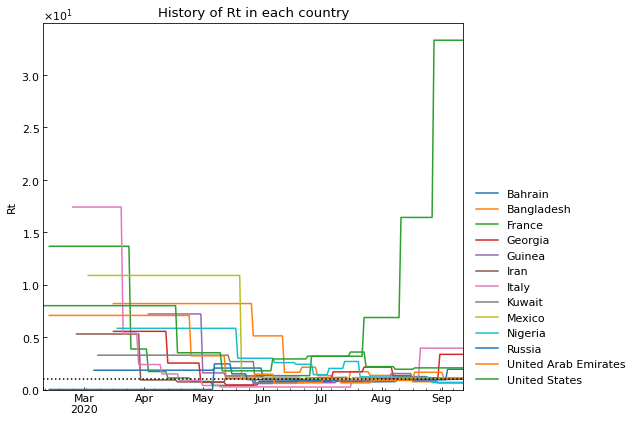

Country,Bahrain,Bangladesh,France,Georgia,Guinea,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,United Arab Emirates,United States
Date,,,,,,,,,,,,,
2020-09-08,1.95,0.65,33.31,3.37,0.68,1.08,3.96,1.09,1.01,0.68,1.0,1.12,2.08
2020-09-09,1.95,0.65,33.31,3.37,0.68,1.08,3.96,1.09,1.01,0.68,1.0,1.12,2.08
2020-09-10,1.95,0.65,33.31,3.37,0.68,1.08,3.96,1.09,1.01,0.68,1.0,1.12,2.08
2020-09-11,1.95,0.65,33.31,3.37,0.68,1.08,3.96,1.09,1.01,0.68,1.0,1.12,2.08
2020-09-12,1.95,0.65,33.31,3.37,0.68,1.08,3.96,1.09,1.01,0.68,1.0,1.12,2.08


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

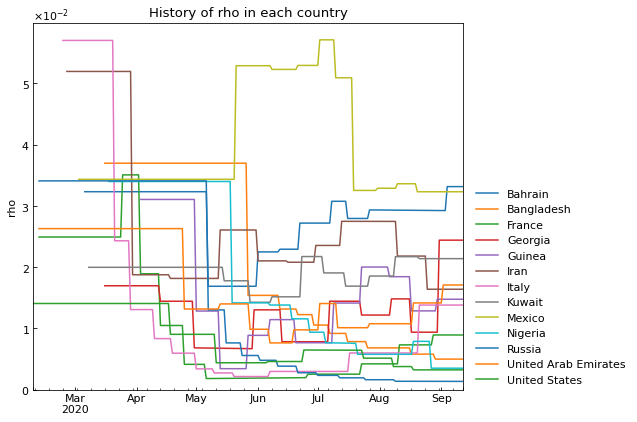

Country,Bahrain,Bangladesh,France,Georgia,Guinea,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,United Arab Emirates,United States
Date,,,,,,,,,,,,,
2020-09-08,0.033148,0.004991,0.008931,0.024407,0.014761,0.016397,0.013813,0.021389,0.032307,0.003511,0.001354,0.01709,0.003236
2020-09-09,0.033148,0.004991,0.008931,0.024407,0.014761,0.016397,0.013813,0.021389,0.032307,0.003511,0.001354,0.01709,0.003236
2020-09-10,0.033148,0.004991,0.008931,0.024407,0.014761,0.016397,0.013813,0.021389,0.032307,0.003511,0.001354,0.01709,0.003236
2020-09-11,0.033148,0.004991,0.008931,0.024407,0.014761,0.016397,0.013813,0.021389,0.032307,0.003511,0.001354,0.01709,0.003236
2020-09-12,0.033148,0.004991,0.008931,0.024407,0.014761,0.016397,0.013813,0.021389,0.032307,0.003511,0.001354,0.01709,0.003236


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

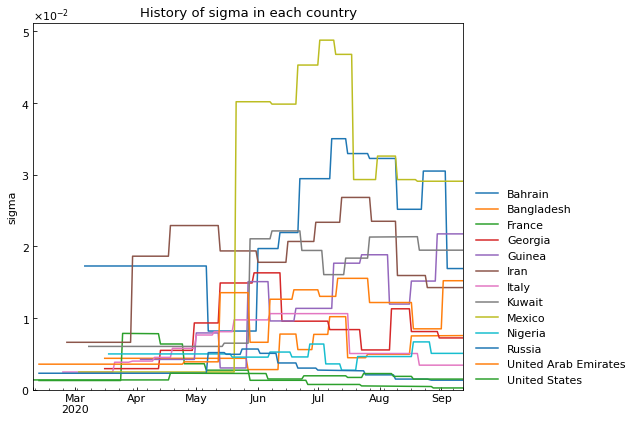

Country,Bahrain,Bangladesh,France,Georgia,Guinea,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,United Arab Emirates,United States
Date,,,,,,,,,,,,,
2020-09-08,0.016911,0.007553,0.000244,0.007226,0.021748,0.014254,0.003425,0.019476,0.029098,0.005071,0.00133,0.015212,0.001482
2020-09-09,0.016911,0.007553,0.000244,0.007226,0.021748,0.014254,0.003425,0.019476,0.029098,0.005071,0.00133,0.015212,0.001482
2020-09-10,0.016911,0.007553,0.000244,0.007226,0.021748,0.014254,0.003425,0.019476,0.029098,0.005071,0.00133,0.015212,0.001482
2020-09-11,0.016911,0.007553,0.000244,0.007226,0.021748,0.014254,0.003425,0.019476,0.029098,0.005071,0.00133,0.015212,0.001482
2020-09-12,0.016911,0.007553,0.000244,0.007226,0.021748,0.014254,0.003425,0.019476,0.029098,0.005071,0.00133,0.015212,0.001482


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

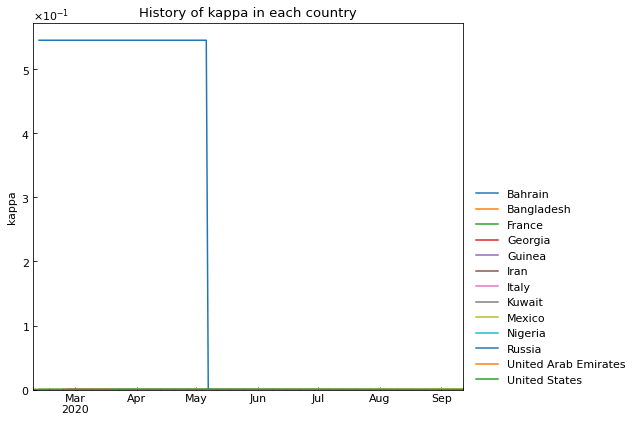

Country,Bahrain,Bangladesh,France,Georgia,Guinea,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,United Arab Emirates,United States
Date,,,,,,,,,,,,,
2020-09-08,0.000079,0.000079,0.000024,0.000002,0.000087,0.000257,0.000064,0.00008,0.001293,0.000087,0.000006,0.000001,0.000071
2020-09-09,0.000079,0.000079,0.000024,0.000002,0.000087,0.000257,0.000064,0.00008,0.001293,0.000087,0.000006,0.000001,0.000071
2020-09-10,0.000079,0.000079,0.000024,0.000002,0.000087,0.000257,0.000064,0.00008,0.001293,0.000087,0.000006,0.000001,0.000071
2020-09-11,0.000079,0.000079,0.000024,0.000002,0.000087,0.000257,0.000064,0.00008,0.001293,0.000087,0.000006,0.000001,0.000071
2020-09-12,0.000079,0.000079,0.000024,0.000002,0.000087,0.000257,0.000064,0.00008,0.001293,0.000087,0.000006,0.000001,0.000071


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

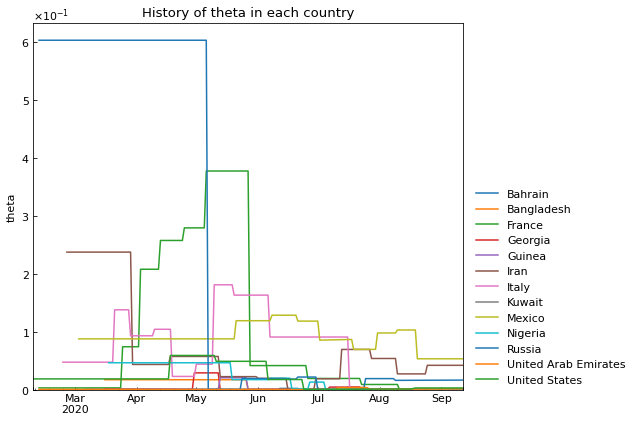

Country,Bahrain,Bangladesh,France,Georgia,Guinea,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,United Arab Emirates,United States
Date,,,,,,,,,,,,,
2020-09-08,0.000343,0.000348,0.000997,0.000905,0.000412,0.042052,0.000221,0.000402,0.053321,0.000519,0.016572,0.001255,0.003015
2020-09-09,0.000343,0.000348,0.000997,0.000905,0.000412,0.042052,0.000221,0.000402,0.053321,0.000519,0.016572,0.001255,0.003015
2020-09-10,0.000343,0.000348,0.000997,0.000905,0.000412,0.042052,0.000221,0.000402,0.053321,0.000519,0.016572,0.001255,0.003015
2020-09-11,0.000343,0.000348,0.000997,0.000905,0.000412,0.042052,0.000221,0.000402,0.053321,0.000519,0.016572,0.001255,0.003015
2020-09-12,0.000343,0.000348,0.000997,0.000905,0.000412,0.042052,0.000221,0.000402,0.053321,0.000519,0.016572,0.001255,0.003015


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42077 entries, 0 to 42244
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 42077 non-null  datetime64[ns]
 1   Country                              42077 non-null  object        
 2   Rt                                   42077 non-null  float64       
 3   theta                                42077 non-null  float64       
 4   kappa                                42077 non-null  float64       
 5   rho                                  42077 non-null  float64       
 6   sigma                                42077 non-null  float64       
 7   School_closing                       42077 non-null  int64         
 8   Workplace_closing                    42077 non-null  int64         
 9   Cancel_events                        42077 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.321110,-0.291013,0.125676,-0.224423,-0.205021,-0.141218,-0.129236,-0.064601,-0.235086,-0.245881,-0.222715,-0.513549,-0.116717,-0.233600,-0.239937,-0.227759
theta,-0.321110,1.000000,0.965491,0.728042,-0.057350,-0.204831,-0.088546,-0.275893,-0.289085,-0.255552,0.139723,-0.053332,0.218343,-0.322872,-0.342182,-0.003972,-0.113139
kappa,-0.291013,0.965491,1.000000,0.752551,-0.113159,-0.241119,-0.144875,-0.302918,-0.295945,-0.266808,0.134943,-0.071136,0.229332,-0.350126,-0.285656,-0.001510,-0.162369
rho,0.125676,0.728042,0.752551,1.000000,0.065382,-0.175214,-0.117045,-0.355723,-0.346619,-0.322163,0.040375,-0.165442,0.059946,-0.387339,-0.451516,-0.136352,-0.195716
sigma,-0.224423,-0.057350,-0.113159,0.065382,1.000000,0.246767,0.083360,0.116231,-0.098802,0.010954,0.014939,-0.070676,0.071296,0.133725,-0.068049,0.171960,0.134244
School_closing,-0.205021,-0.204831,-0.241119,-0.175214,0.246767,1.000000,0.764754,0.730381,0.601034,0.575316,0.514138,0.521724,0.574738,0.719335,0.553788,0.307371,0.807931
Workplace_closing,-0.141218,-0.088546,-0.144875,-0.117045,0.083360,0.764754,1.000000,0.719613,0.746720,0.704489,0.711801,0.696919,0.502970,0.777506,0.514533,0.350736,0.899364
Cancel_events,-0.129236,-0.275893,-0.302918,-0.355723,0.116231,0.730381,0.719613,1.000000,0.827772,0.534996,0.597946,0.663865,0.438940,0.897208,0.654791,0.647539,0.864406
Gatherings_restrictions,-0.064601,-0.289085,-0.295945,-0.346619,-0.098802,0.601034,0.746720,0.827772,1.000000,0.727360,0.670639,0.765547,0.461230,0.850425,0.695443,0.477169,0.866213
Transport_closing,-0.235086,-0.255552,-0.266808,-0.322163,0.010954,0.575316,0.704489,0.534996,0.727360,1.000000,0.641091,0.755184,0.547366,0.579867,0.611032,0.213224,0.762192


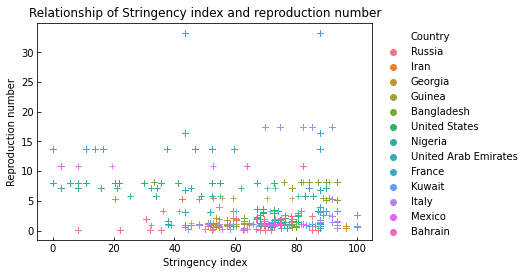

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()